Author: Roel Faber

Goal of this script: take the raw matchdata from Eredivisiedata.ipynb and use it to create useful features, such as match history, standings, form, etc.

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [26]:
df = pd.read_csv('Data/matches.csv',index_col=0)
df.head()

,Season,Round,Home,Away,HomeGoals,AwayGoals,Result,HomePoints,AwayPoints
0,1959-1960,1,ADO Den Haag,Willem II,3,3,3,1,1
1,1959-1960,1,AFC Ajax,NAC Breda,3,0,1,3,0
2,1959-1960,1,Blauw Wit,Sittardia,5,2,1,3,0
3,1959-1960,1,USV Elinkwijk,MVV Maastricht,2,0,1,3,0
4,1959-1960,1,Feijenoord,Sparta Rotterdam,0,1,2,0,3


In [52]:
df

,Season,Round,Home,Away,HomeGoals,AwayGoals,Result,HomePoints,AwayPoints,GoalsScored
0,1959-1960,1,ADO Den Haag,Willem II,3,3,3,1,1,6
1,1959-1960,1,AFC Ajax,NAC Breda,3,0,1,3,0,3
2,1959-1960,1,Blauw Wit,Sittardia,5,2,1,3,0,7
3,1959-1960,1,USV Elinkwijk,MVV Maastricht,2,0,1,3,0,2
4,1959-1960,1,Feijenoord,Sparta Rotterdam,0,1,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...
18118,2019-2020,12,FC Emmen,Vitesse,2,1,1,3,0,3
18119,2019-2020,12,FC Utrecht,Fortuna Sittard,6,0,1,3,0,6
18120,2019-2020,12,VVV-Venlo,Feyenoord,0,3,2,0,3,3
18121,2019-2020,12,FC Groningen,Willem II,2,0,1,3,0,2


# Compute columns

In [27]:
df['GoalsScored'] = df['HomeGoals'] + df['AwayGoals']

# Data Visualization

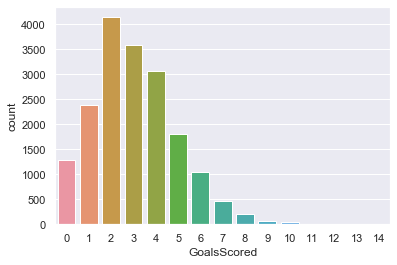

In [28]:
sns.countplot(df['GoalsScored'])

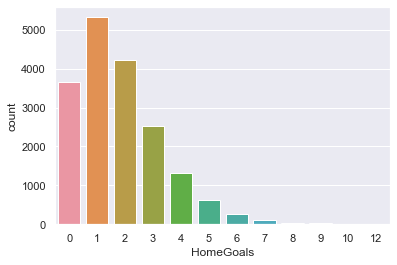

In [21]:
sns.countplot(x="HomeGoals",data=df)

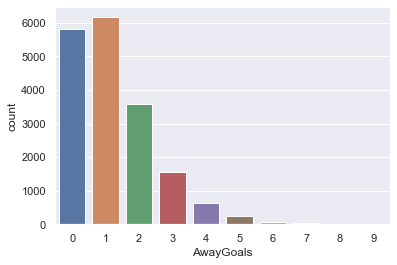

In [53]:
sns.countplot(x="AwayGoals",data=df)

In [54]:
df['Result'].value_counts()

1    8691
2    4835
3    4597
Name: Result, dtype: int64

# Get more informative features

Features to include:

1) Standings in previous season(s)

2) Recent results against the opponent

3) Recent form (results of previous matches)

## Standings in seasons

In [31]:
season = df[df['Season']=='2019-2020']

In [32]:
season

,Season,Round,Home,Away,HomeGoals,AwayGoals,Result,HomePoints,AwayPoints,GoalsScored
18015,2019-2020,1,PEC Zwolle,Willem II,1,3,2,0,3,4
18016,2019-2020,1,Vitesse,AFC Ajax,2,2,3,1,1,4
18017,2019-2020,1,FC Emmen,FC Groningen,0,1,2,0,3,1
18018,2019-2020,1,VVV-Venlo,RKC Waalwijk,3,1,1,3,0,4
18019,2019-2020,1,FC Twente,PSV,1,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
18118,2019-2020,12,FC Emmen,Vitesse,2,1,1,3,0,3
18119,2019-2020,12,FC Utrecht,Fortuna Sittard,6,0,1,3,0,6
18120,2019-2020,12,VVV-Venlo,Feyenoord,0,3,2,0,3,3
18121,2019-2020,12,FC Groningen,Willem II,2,0,1,3,0,2


In [55]:
points_df = pd.DataFrame(index=df['Season'].unique(),columns=df['Home'].unique())

In [56]:
points_df

,ADO Den Haag,AFC Ajax,Blauw Wit,USV Elinkwijk,Feijenoord,Fortuna '54,Rapid JC Heerlen,FC Volendam,VVV-Venlo,DOS Utrecht,...,RKC Waalwijk,sc Heerenveen,S.V.V./Dordrecht '90,SC Cambuur,FC Den Bosch,Dordrecht '90,RBC Roosendaal,FC Zwolle,FC Dordrecht,FC Emmen
1959-1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
teamlist = season['Home'].unique()

In [34]:
standings = pd.DataFrame(index=teamlist,columns=range(1,35))

In [39]:
for index, row in season.iterrows():
    standings.loc[row['Home'],row['Round']] = row['HomePoints']
    standings.loc[row['Away'],row['Round']] = row['AwayPoints']

In [41]:
standings['Total'] = standings.sum(axis=1)

In [51]:
standings['Total'].rank(ascending=False).sort_values()

AFC Ajax             1.0
AZ Alkmaar           2.0
PSV                  3.0
FC Utrecht           4.5
Vitesse              4.5
Willem II            6.0
Heracles Almelo      7.5
sc Heerenveen        7.5
Feyenoord            9.5
FC Groningen         9.5
Sparta Rotterdam    11.0
FC Twente           12.0
FC Emmen            13.0
ADO Den Haag        14.5
PEC Zwolle          14.5
VVV-Venlo           16.5
Fortuna Sittard     16.5
RKC Waalwijk        18.0
Name: Total, dtype: float64

In [12]:
df['AwayGoals'].mean()

1.2431164818186835